DATA PREPROCESSING

In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
df_cardio = pd.read_csv("Cardiovascular_Disease_Dataset.csv")
df_heart = pd.read_csv("heart.csv")

In [129]:
df_cardio = df_cardio.drop(columns=["patientid", "noofmajorvessels"])

In [130]:
import pandas as pd

sex_map = {'M': 1, 'F': 0}
chest_pain_map = {'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3}
resting_ecg_map = {'Normal': 0, 'ST': 1, 'LVH': 2}
exercise_angina_map = {'Y': 1, 'N': 0}
st_slope_map = {'Up': 1, 'Flat': 2, 'Down': 3}

# Apply mappings
df_heart['Sex'] = df_heart['Sex'].map(sex_map)
df_heart['ChestPainType'] = df_heart['ChestPainType'].map(chest_pain_map)
df_heart['RestingECG'] = df_heart['RestingECG'].map(resting_ecg_map)
df_heart['ExerciseAngina'] = df_heart['ExerciseAngina'].map(exercise_angina_map)
df_heart['ST_Slope'] = df_heart['ST_Slope'].map(st_slope_map)

# Save the transformed dataset
df_heart.to_csv("heart_data_transformed.csv", index=False)

# Display transformed dataset
print(df_heart.head())


   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           0   
1   49    0              2        160          180          0           0   
2   37    1              1        130          283          0           1   
3   48    0              3        138          214          0           0   
4   54    1              2        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         1             0  
1    156               0      1.0         2             1  
2     98               0      0.0         1             0  
3    108               1      1.5         2             1  
4    122               0      0.0         1             0  


In [131]:
# Convert column names to lowercase
df_cardio.columns = df_cardio.columns.str.lower()
df_heart.columns = df_heart.columns.str.lower()

# Rename columns in df_heart to match df_cardio
df_heart = df_heart.rename(columns={
    "age": "age",
    "sex": "gender",
    "chestpaintype": "chestpain",
    "restingbp": "restingbp",
    "cholesterol": "serumcholestrol",
    "fastingbs": "fastingbloodsugar",
    "restingecg": "restingrelectro",
    "maxhr": "maxheartrate",
    "exerciseangina": "exerciseangia",
    "oldpeak": "oldpeak",
    "st_slope": "slope",
    "heartdisease": "target"
})

# Select only the required columns from df_heart to match df_cardio
df_heart = df_heart[df_cardio.columns]

# Concatenate the dataframes
df = pd.concat([df_cardio, df_heart], ignore_index=True)

# Display the new dataframe
print(df.info())  # Check if all columns are properly merged


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1918 non-null   int64  
 1   gender             1918 non-null   int64  
 2   chestpain          1918 non-null   int64  
 3   restingbp          1918 non-null   int64  
 4   serumcholestrol    1918 non-null   int64  
 5   fastingbloodsugar  1918 non-null   int64  
 6   restingrelectro    1918 non-null   int64  
 7   maxheartrate       1918 non-null   int64  
 8   exerciseangia      1918 non-null   int64  
 9   oldpeak            1918 non-null   float64
 10  slope              1918 non-null   int64  
 11  target             1918 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 179.9 KB
None


In [132]:
print(df.head(10))

   age  gender  chestpain  restingbp  serumcholestrol  fastingbloodsugar  \
0   53       1          2        171                0                  0   
1   40       1          0         94              229                  0   
2   49       1          2        133              142                  0   
3   43       1          0        138              295                  1   
4   31       1          1        199                0                  0   
5   24       1          1        173                0                  0   
6   79       1          2        130              240                  0   
7   52       1          0        127              345                  0   
8   62       1          0        121              357                  0   
9   61       0          0        190              181                  0   

   restingrelectro  maxheartrate  exerciseangia  oldpeak  slope  target  
0                1           147              0      5.3      3       1  
1              

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1918 non-null   int64  
 1   gender             1918 non-null   int64  
 2   chestpain          1918 non-null   int64  
 3   restingbp          1918 non-null   int64  
 4   serumcholestrol    1918 non-null   int64  
 5   fastingbloodsugar  1918 non-null   int64  
 6   restingrelectro    1918 non-null   int64  
 7   maxheartrate       1918 non-null   int64  
 8   exerciseangia      1918 non-null   int64  
 9   oldpeak            1918 non-null   float64
 10  slope              1918 non-null   int64  
 11  target             1918 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 179.9 KB


In [134]:
df.isnull().any()

age                  False
gender               False
chestpain            False
restingbp            False
serumcholestrol      False
fastingbloodsugar    False
restingrelectro      False
maxheartrate         False
exerciseangia        False
oldpeak              False
slope                False
target               False
dtype: bool

Removing Duplicate if any

In [135]:
df.shape

(1918, 12)

In [136]:
df = df.drop_duplicates()
df.shape

(1918, 12)

In [137]:
df.columns

Index(['age', 'gender', 'chestpain', 'restingbp', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'target'],
      dtype='object')

In [138]:
df = df.drop_duplicates()
df.shape

(1918, 12)

EDA

In [139]:
df.describe()

,age,gender,chestpain,restingbp,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,target
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000
mean,51.285193,0.776851,1.588634,142.485401,257.531283,0.265902,0.678832,141.328467,0.453076,1.836444,1.587070,0.567258
std,14.609167,0.416466,1.136586,26.932915,134.286677,0.441928,0.790581,30.627152,0.497923,1.707201,0.838858,0.495585
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,41.000000,1.000000,1.000000,124.000000,197.250000,0.000000,0.000000,120.000000,0.000000,0.300000,1.000000,0.000000
50%,53.000000,1.000000,2.000000,138.000000,256.000000,0.000000,0.000000,141.000000,0.000000,1.500000,2.000000,1.000000
75%,62.000000,1.000000,3.000000,160.000000,337.000000,1.000000,1.000000,165.000000,1.000000,2.900000,2.000000,1.000000
max,80.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [140]:
df.columns

Index(['age', 'gender', 'chestpain', 'restingbp', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'target'],
      dtype='object')

<Axes: >

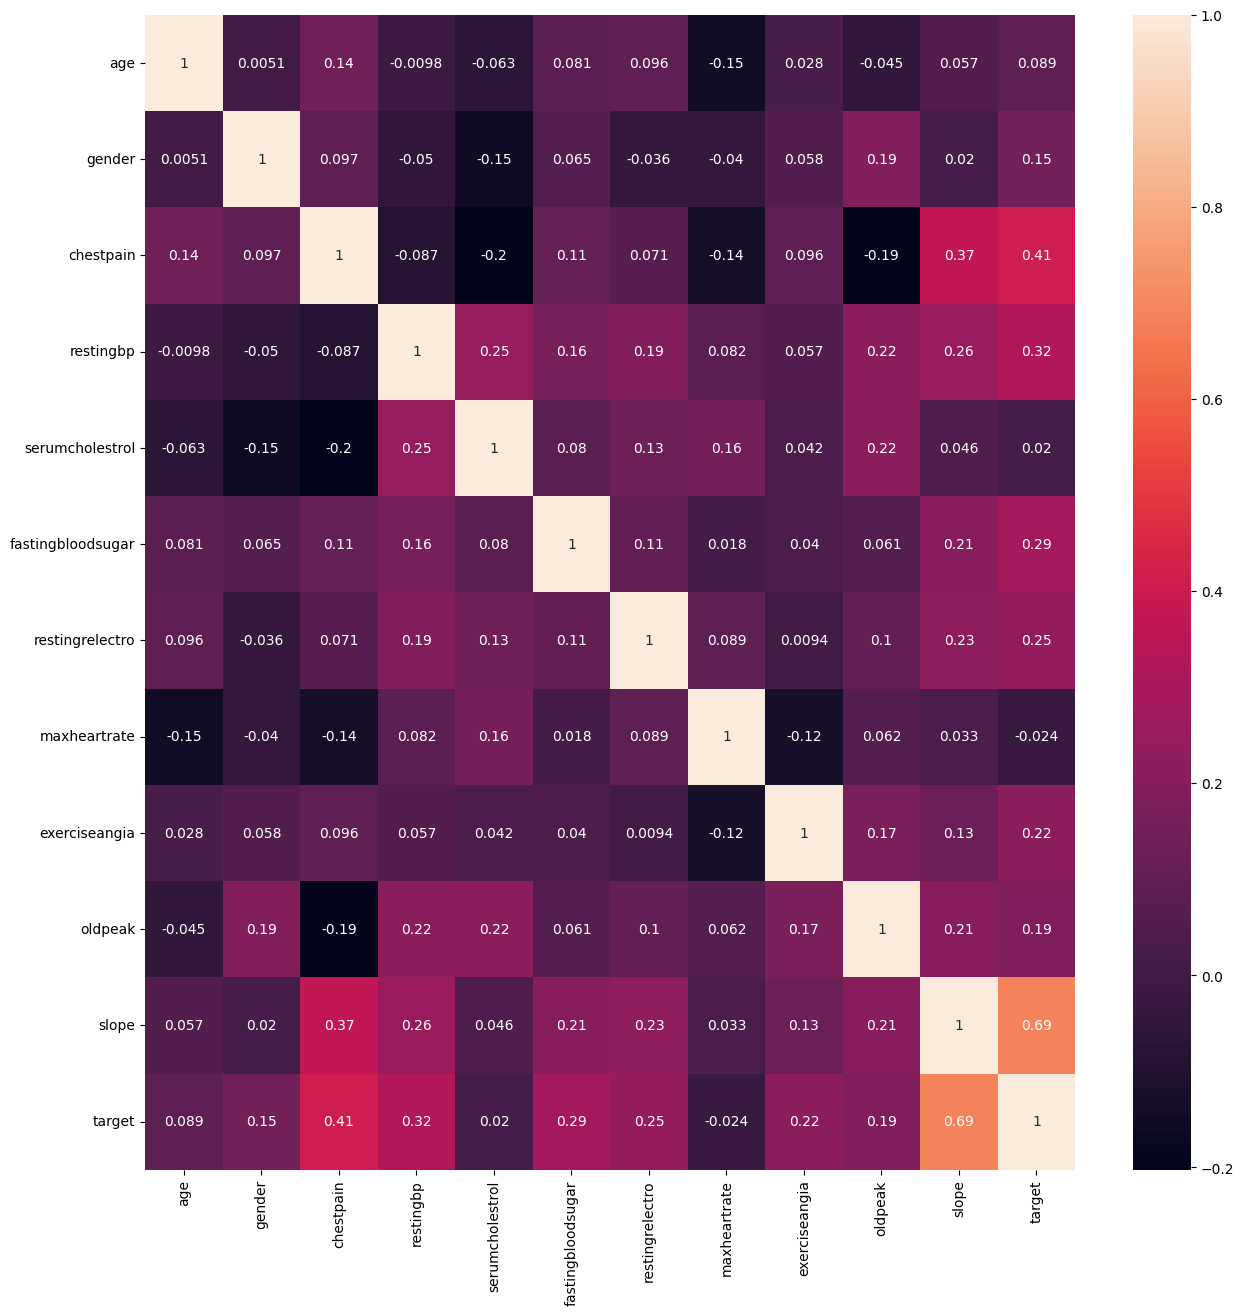

In [141]:
correlation = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(correlation,annot=True)

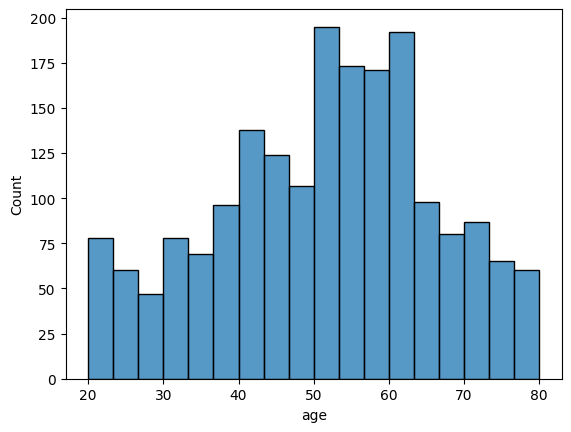

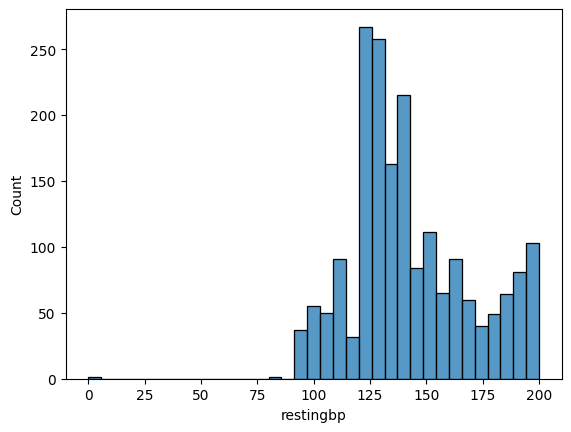

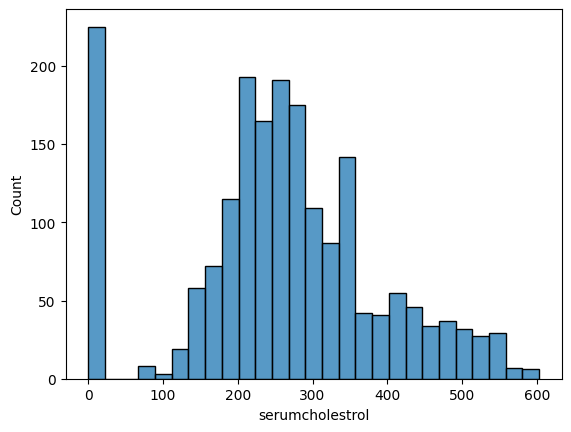

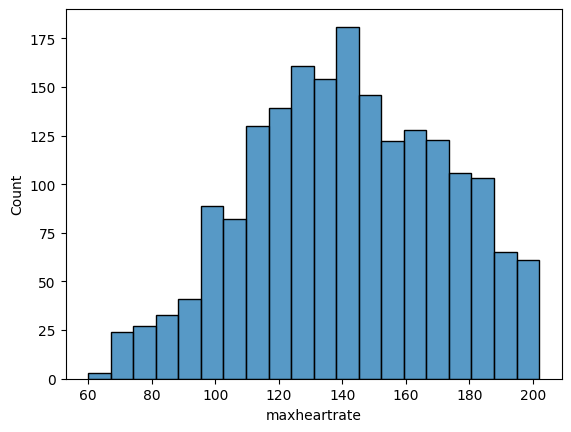

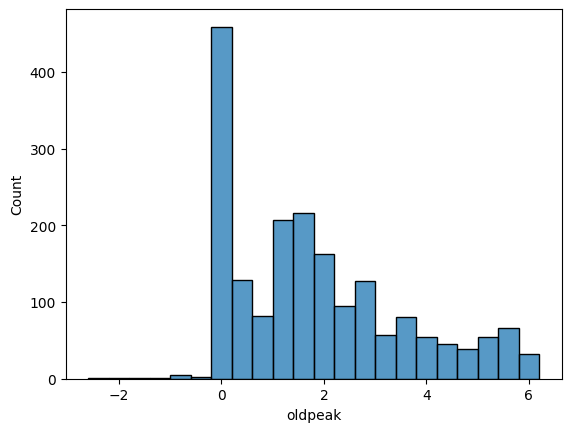

In [142]:
for i in ["age", "restingbp", "serumcholestrol", "maxheartrate","oldpeak"]:
    sns.histplot(data=df, x=df[i])
    plt.show()


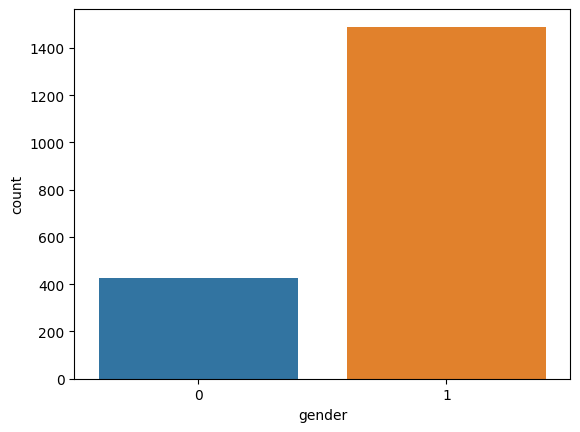

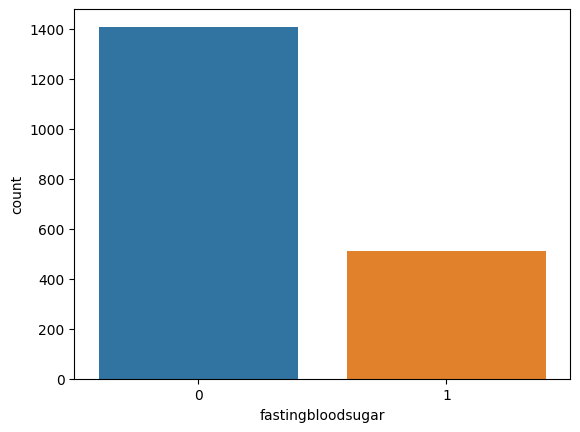

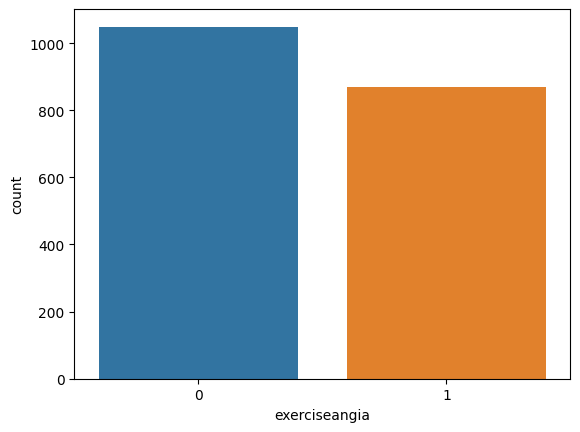

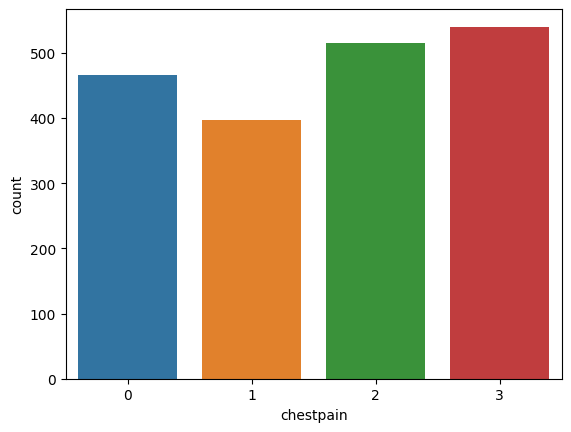

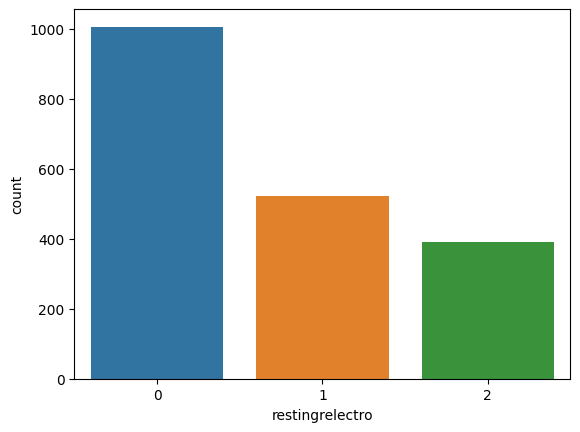

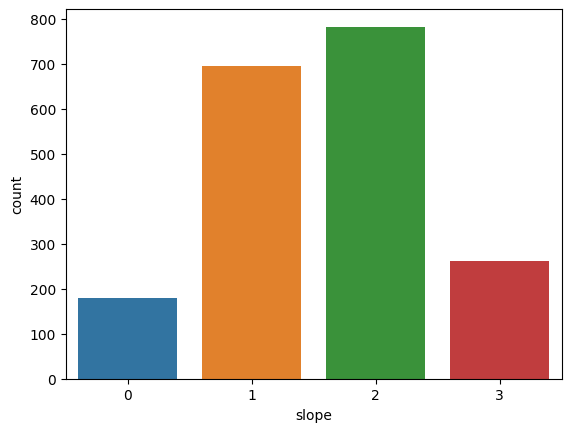

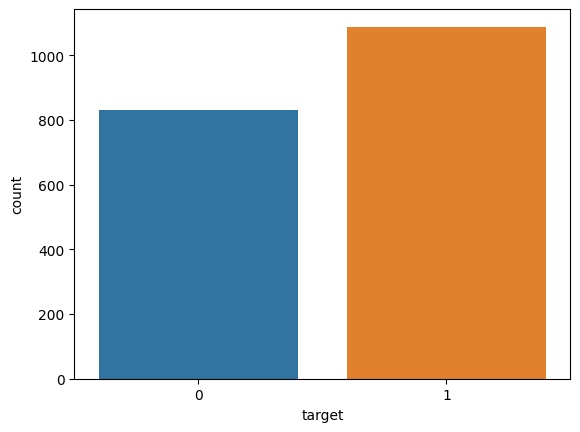

In [143]:
#for binary values
for i in ["gender",'fastingbloodsugar',"exerciseangia","chestpain", "restingrelectro","slope","target"]:
    sns.countplot(x=df[i], data=df)
    plt.show()

In [144]:
df.columns

Index(['age', 'gender', 'chestpain', 'restingbp', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'target'],
      dtype='object')

Removing Noises

Outliers

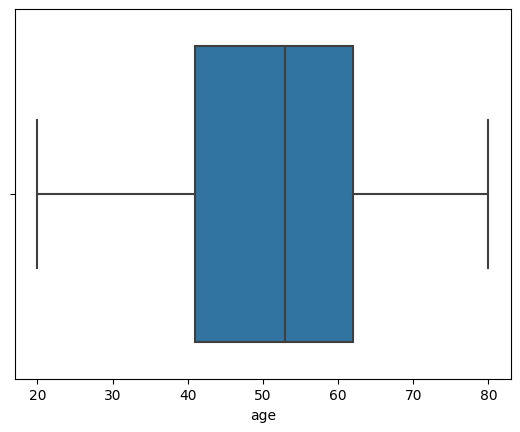

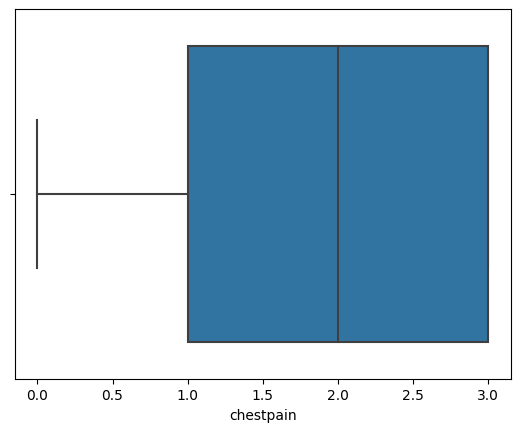

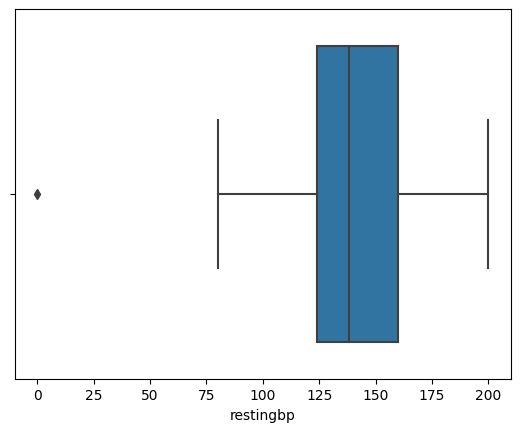

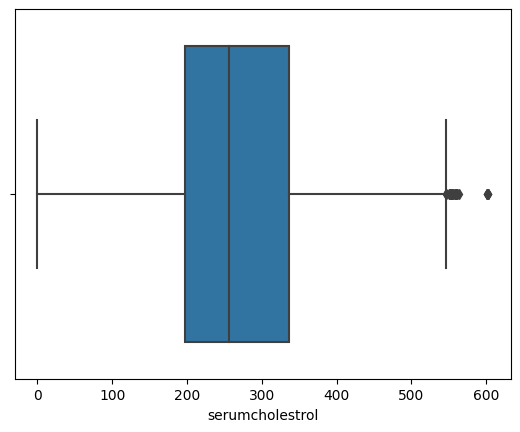

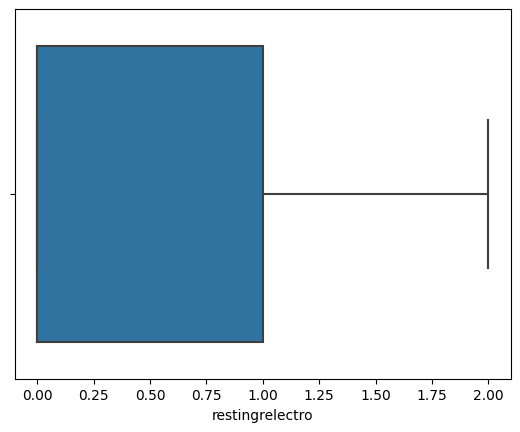

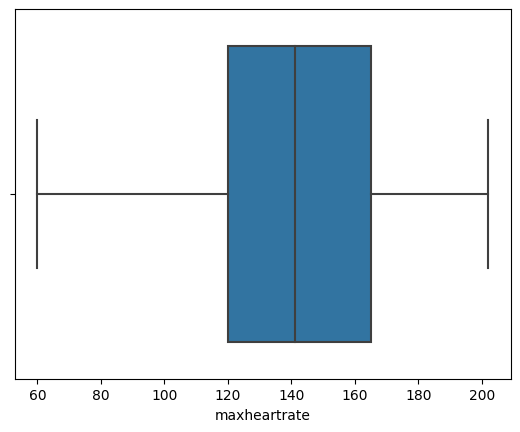

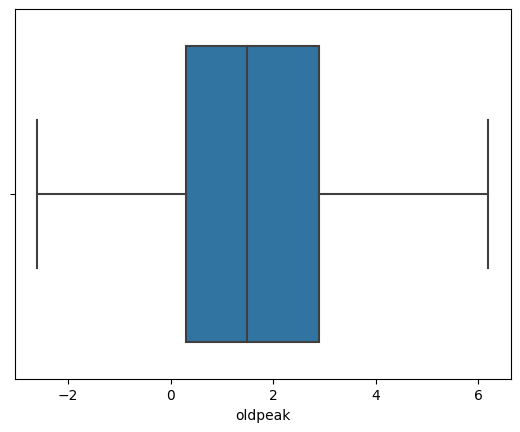

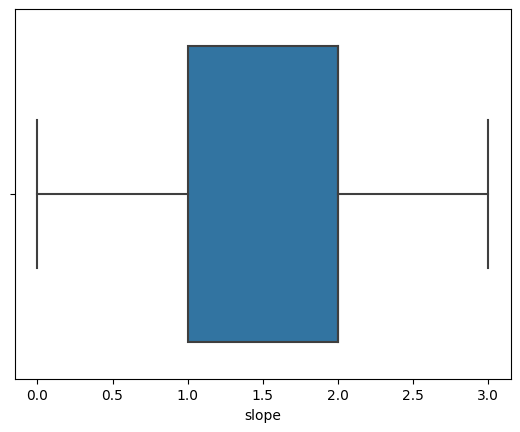

In [145]:
for i in ["age" ,"chestpain" ,"restingbp" ,"serumcholestrol","restingrelectro","maxheartrate","oldpeak","slope"]:
    sns.boxplot(data = df,x = df[i])
    plt.show()

In [146]:
# Serum cholestrol can only have values ranging for 126 - 564 but some 0 values are present
# SINCE NO outliers present it can considered as noise and is df1 is used to make changes

zero_cholestrol_rows = df[df['serumcholestrol'] == 0]

zero_cholestrol_indexes = zero_cholestrol_rows.index

print("Rows count with serumcholestrol value of 0:")
print(zero_cholestrol_rows.shape[0])



Rows count with serumcholestrol value of 0:
225


In [147]:
zero_cholestrol_rows = df[df['serumcholestrol'] > 564]

zero_cholestrol_indexes = zero_cholestrol_rows.index

print("Rows count with serumcholestrol value greater than 564:")
print(zero_cholestrol_rows.shape[0])

Rows count with serumcholestrol value greater than 564:
6


In [148]:
# since the row count with serumcholestrol value greater than 564 is 5 , we can ignore it
df1 = df.copy()
df1['serumcholestrol'].replace(0, np.nan, inplace=True)

In [149]:
df1.isnull().sum()

age                    0
gender                 0
chestpain              0
restingbp              0
serumcholestrol      225
fastingbloodsugar      0
restingrelectro        0
maxheartrate           0
exerciseangia          0
oldpeak                0
slope                  0
target                 0
dtype: int64

Handling Missing Data

In [150]:
# for knn imputation we are gonna use df1
from sklearn.impute import KNNImputer

imputer = KNNImputer()

df1 = imputer.fit_transform(df1)

df1 = pd.DataFrame(df1, columns=df.columns)


In [151]:
df1.isnull().sum()

age                  0
gender               0
chestpain            0
restingbp            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
target               0
dtype: int64

In [152]:
x = df.corr()

In [153]:
target_column = "target"
sorted_corr = x[target_column].sort_values(ascending=False)
sorted_corr

target               1.000000
slope                0.687962
chestpain            0.411712
restingbp            0.323829
fastingbloodsugar    0.287482
restingrelectro      0.248216
exerciseangia        0.215737
oldpeak              0.186786
gender               0.151106
age                  0.088817
serumcholestrol      0.020270
maxheartrate        -0.023658
Name: target, dtype: float64

In [154]:
x= df1.corr()

In [155]:
target_column = "target"
sorted_corr = x[target_column].sort_values(ascending=False)
sorted_corr

target               1.000000
slope                0.687962
chestpain            0.411712
restingbp            0.323829
fastingbloodsugar    0.287482
serumcholestrol      0.266623
restingrelectro      0.248216
exerciseangia        0.215737
oldpeak              0.186786
gender               0.151106
age                  0.088817
maxheartrate        -0.023658
Name: target, dtype: float64

In [156]:
print(df.columns)
print(df.shape)


Index(['age', 'gender', 'chestpain', 'restingbp', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'target'],
      dtype='object')
(1918, 12)


In [157]:
print(df1.columns)
print(df1.shape)

Index(['age', 'gender', 'chestpain', 'restingbp', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'target'],
      dtype='object')
(1918, 12)


# KNN

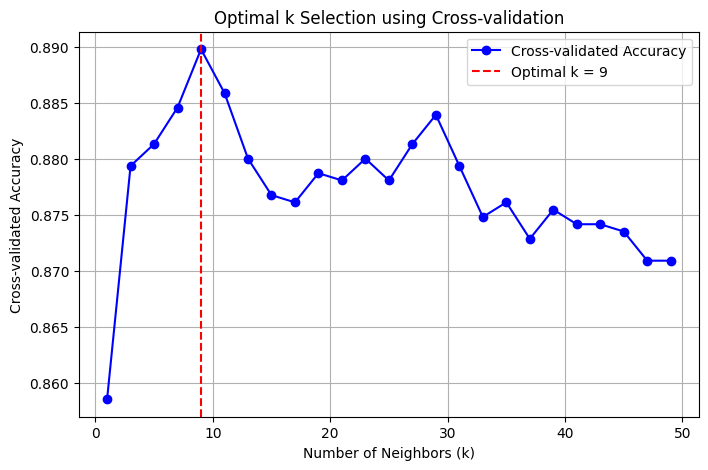

Optimal k for df: 9
AUC-PR for df: 0.9611
Accuracy for df: 0.9036
Classification Report for df:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       155
           1       0.91      0.93      0.92       229

    accuracy                           0.90       384
   macro avg       0.90      0.90      0.90       384
weighted avg       0.90      0.90      0.90       384

Confusion Matrix for df:
[[135  20]
 [ 17 212]]


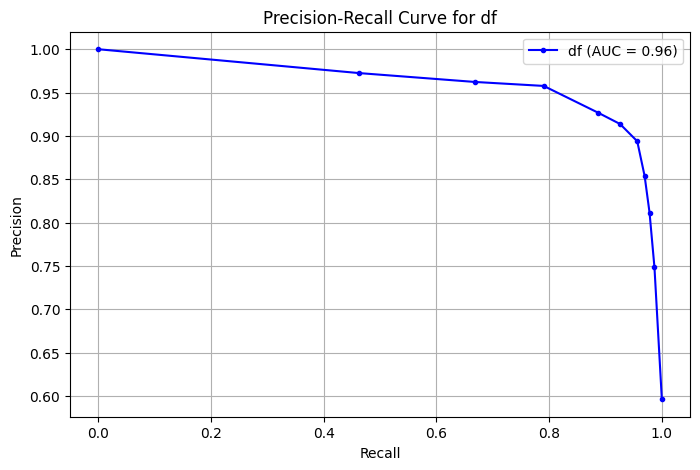

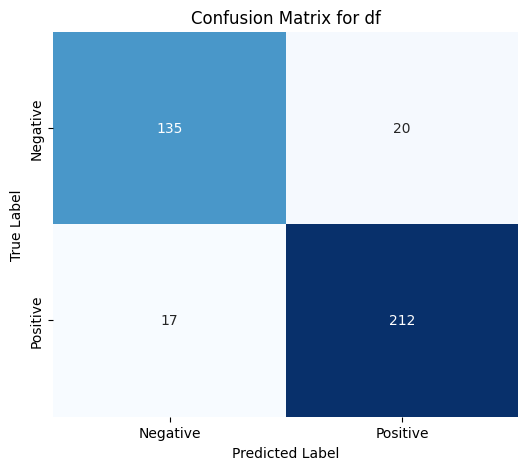

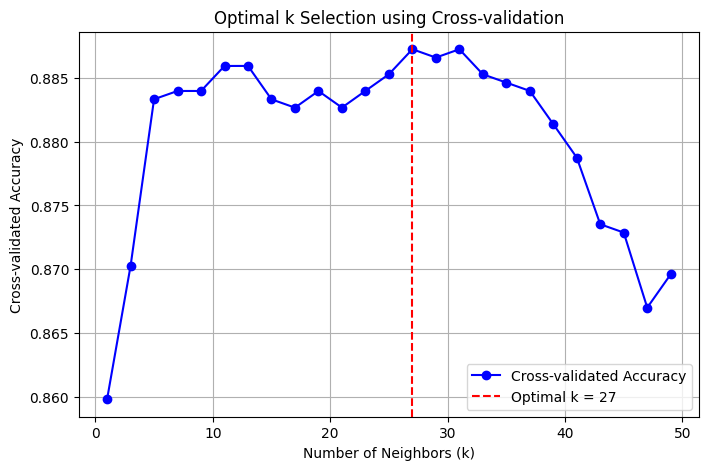

Optimal k for df1: 27
AUC-PR for df1: 0.9630
Accuracy for df1: 0.8906
Classification Report for df1:
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       155
         1.0       0.91      0.91      0.91       229

    accuracy                           0.89       384
   macro avg       0.89      0.89      0.89       384
weighted avg       0.89      0.89      0.89       384

Confusion Matrix for df1:
[[134  21]
 [ 21 208]]


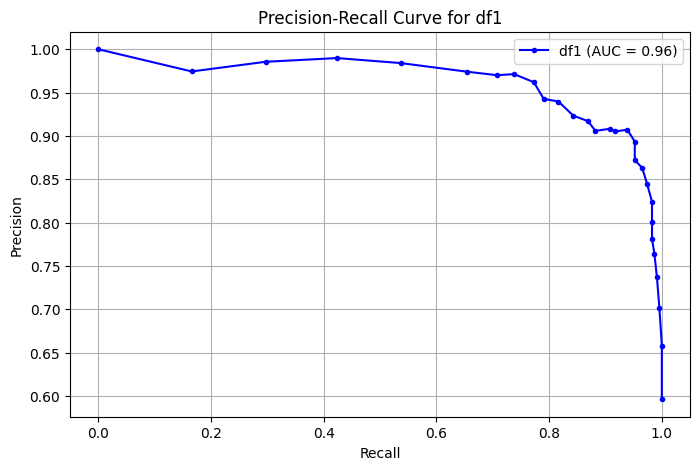

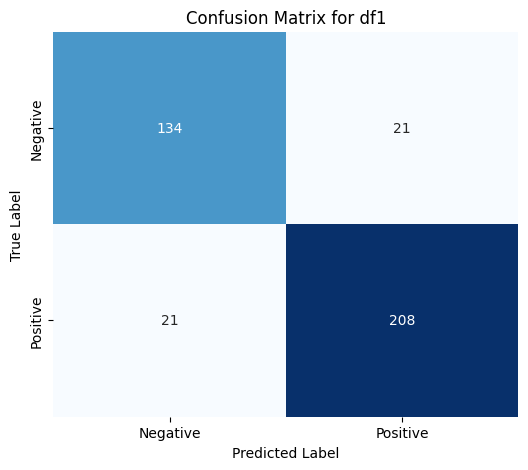

In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to find the optimal k value using cross-validation
def find_optimal_k(X_train, y_train, max_k=50):
    k_values = range(1, max_k, 2)  # Odd values of k to avoid ties
    mean_accuracies = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
        mean_accuracies.append(scores.mean())

    optimal_k = k_values[np.argmax(mean_accuracies)]
    
    # Plot k vs accuracy
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, mean_accuracies, marker='o', linestyle='-', color='b', label='Cross-validated Accuracy')
    plt.axvline(optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Cross-validated Accuracy')
    plt.title('Optimal k Selection using Cross-validation')
    plt.legend()
    plt.grid(True)
    plt.show()

    return optimal_k

# Function to perform KNN with optimal k, PR curve, and evaluation
def knn_pr_curve_and_report(X, y, dataset_label):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Find the optimal k value
    optimal_k = find_optimal_k(X_train_scaled, y_train)

    # Train the model with the optimal k
    knn = KNeighborsClassifier(n_neighbors=optimal_k)
    knn.fit(X_train_scaled, y_train)

    # Predict probabilities and calculate PR curve
    y_scores = knn.predict_proba(X_test_scaled)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)

    # Calculate accuracy
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report and confusion matrix
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print evaluation metrics
    print(f"Optimal k for {dataset_label}: {optimal_k}")
    print(f"AUC-PR for {dataset_label}: {pr_auc:.4f}")
    print(f"Accuracy for {dataset_label}: {accuracy:.4f}")
    print(f"Classification Report for {dataset_label}:\n{class_report}")
    print(f"Confusion Matrix for {dataset_label}:\n{conf_matrix}")

    # Plot the PR curve
    plt.figure(figsize=(8, 5))
    plt.plot(recall, precision, marker='.', label=f'{dataset_label} (AUC = {pr_auc:.2f})', color='blue')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {dataset_label}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {dataset_label}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])  # Adjust x-axis labels
    plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])  # Adjust y-axis labels
    plt.show()

# Define datasets
datasets = {
    'df': (df, 'target'),
    'df1': (df1, 'target')
}

# Iterate over datasets
for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    knn_pr_curve_and_report(X, y, label)


# Logistic Regression

In [159]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score, precision_recall_curve, classification_report


Results for df:
Accuracy: 0.8880
Precision: 0.8995
Recall: 0.9037
F1 Score: 0.9016
ROC AUC Score: 0.9560
PR AUC Score: 0.9628
Cross-validation accuracy: 0.8842 ± 0.0218

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       166
         1.0       0.90      0.90      0.90       218

    accuracy                           0.89       384
   macro avg       0.89      0.89      0.89       384
weighted avg       0.89      0.89      0.89       384


Confusion Matrix:
[[144  22]
 [ 21 197]]


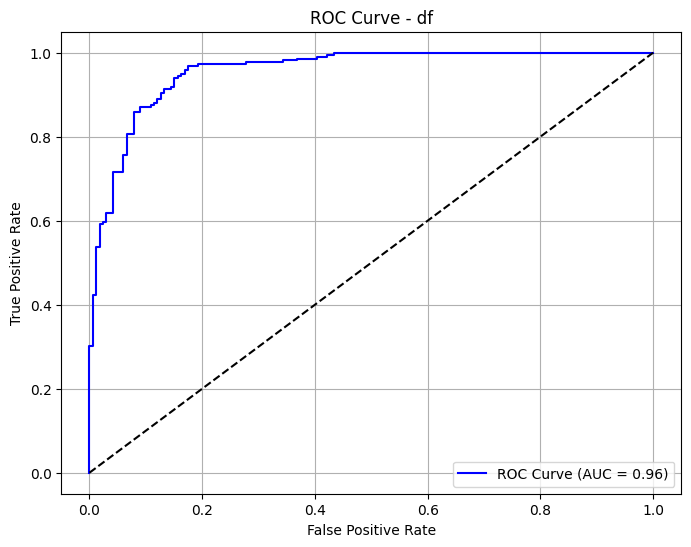

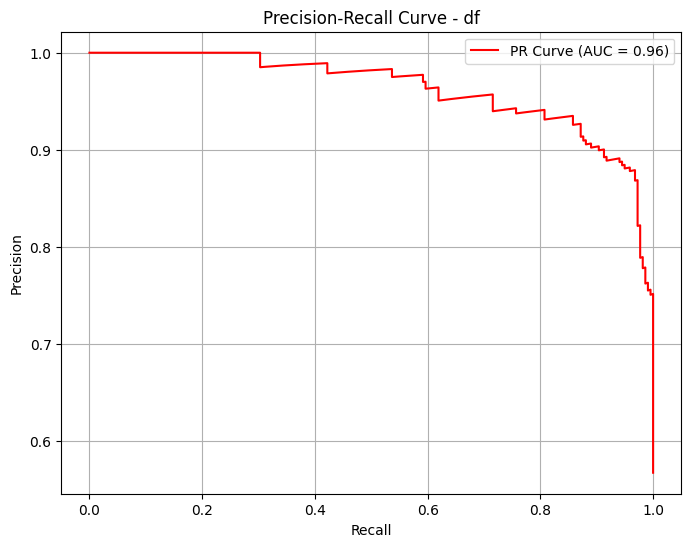

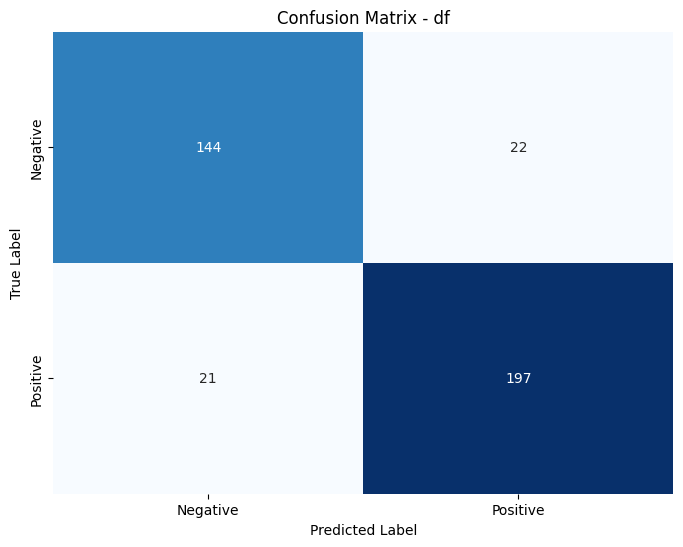


Results for df1:
Accuracy: 0.8880
Precision: 0.8995
Recall: 0.9037
F1 Score: 0.9016
ROC AUC Score: 0.9560
PR AUC Score: 0.9628
Cross-validation accuracy: 0.8842 ± 0.0218

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       166
         1.0       0.90      0.90      0.90       218

    accuracy                           0.89       384
   macro avg       0.89      0.89      0.89       384
weighted avg       0.89      0.89      0.89       384


Confusion Matrix:
[[144  22]
 [ 21 197]]


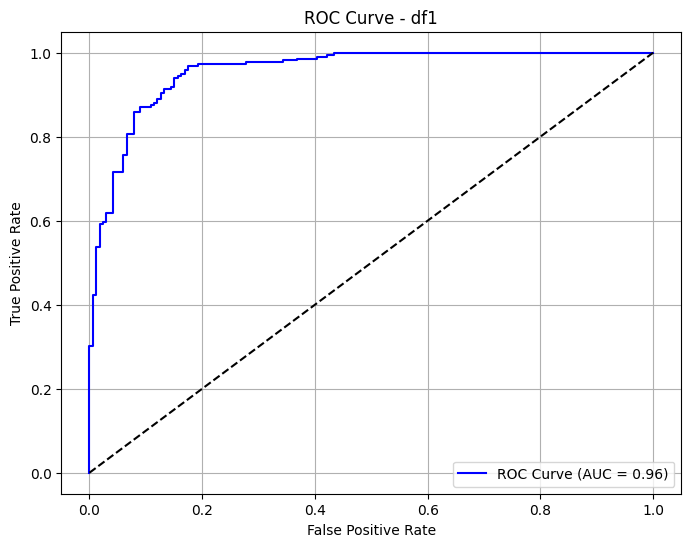

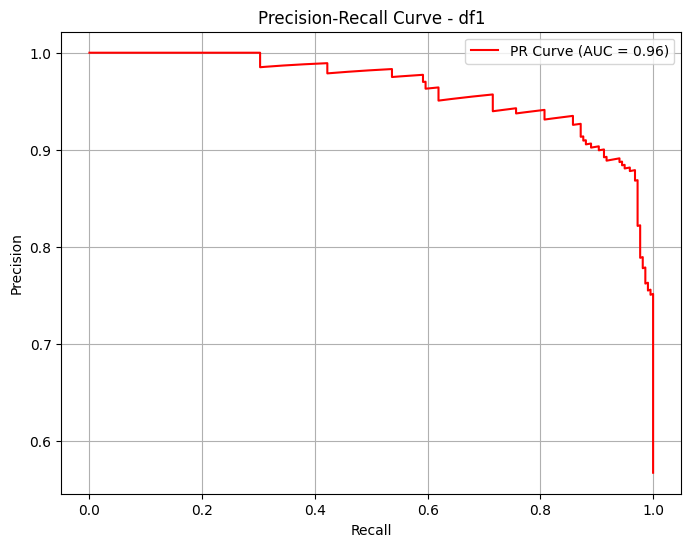

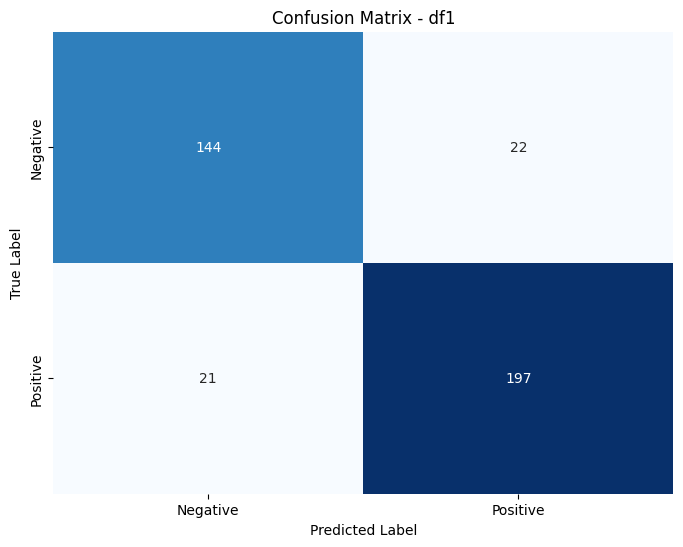

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    roc_curve, auc, classification_report, precision_recall_curve, roc_auc_score
)

def logistic_regression(X, y, dataset_label):
    # Stratified split to maintain class balance
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Standardizing the dataset
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_scaled = scaler.transform(X)  # Scale for cross-validation

    # Train Logistic Regression with increased iterations and balanced class weight
    logreg = LogisticRegression(random_state=42, max_iter=10000, solver='saga', class_weight='balanced', n_jobs=-1)
    logreg.fit(X_train, y_train)

    # Get predictions
    y_pred = logreg.predict(X_test)
    y_score_logreg = logreg.predict_proba(X_test)[:, 1]

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_score_logreg)
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_score_logreg)
    pr_auc = auc(recall_vals, precision_vals)

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(logreg, X_scaled, y, cv=cv, scoring='accuracy')

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"\n{'='*50}\nResults for {dataset_label}:\n{'='*50}")
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC AUC Score: {roc_auc:.4f}')
    print(f'PR AUC Score: {pr_auc:.4f}')
    print(f'Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')
    print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
    print(f"\nConfusion Matrix:\n{cm}\n{'='*50}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_score_logreg)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {dataset_label}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall_vals, precision_vals, label=f'PR Curve (AUC = {pr_auc:.2f})', color='red')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {dataset_label}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {dataset_label}')
    plt.show()

# Example usage
datasets = {
    'df': (df, 'target'),
    'df1': (df1, 'target')
}

for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    logistic_regression(X, y, label)


# Decision Tree

In [161]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc, accuracy_score, classification_report, confusion_matrix, precision_recall_curve, make_scorer, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

Optimal parameters: {'criterion': 'gini', 'max_depth': 6}
Classification Report for df: 
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.83       155
         1.0       0.89      0.88      0.89       229

    accuracy                           0.86       384
   macro avg       0.86      0.86      0.86       384
weighted avg       0.86      0.86      0.86       384

PR AUC: 0.9239993740849135
Accuracy for df: 0.86


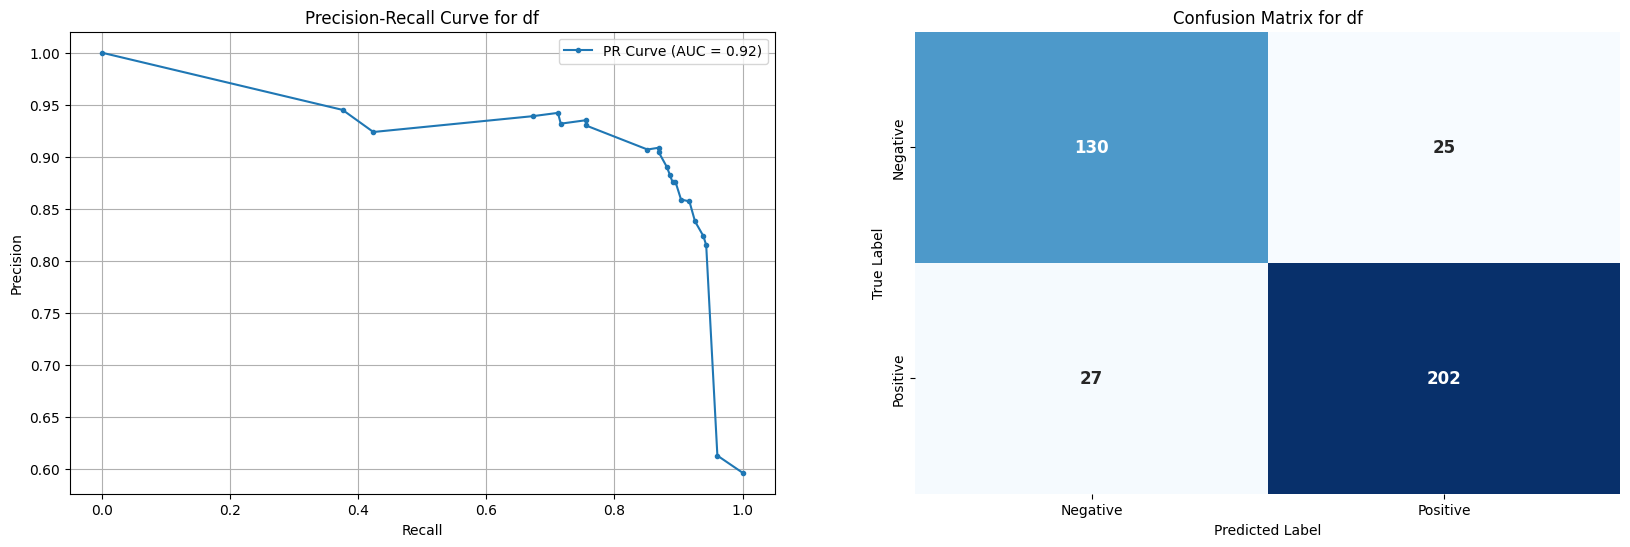

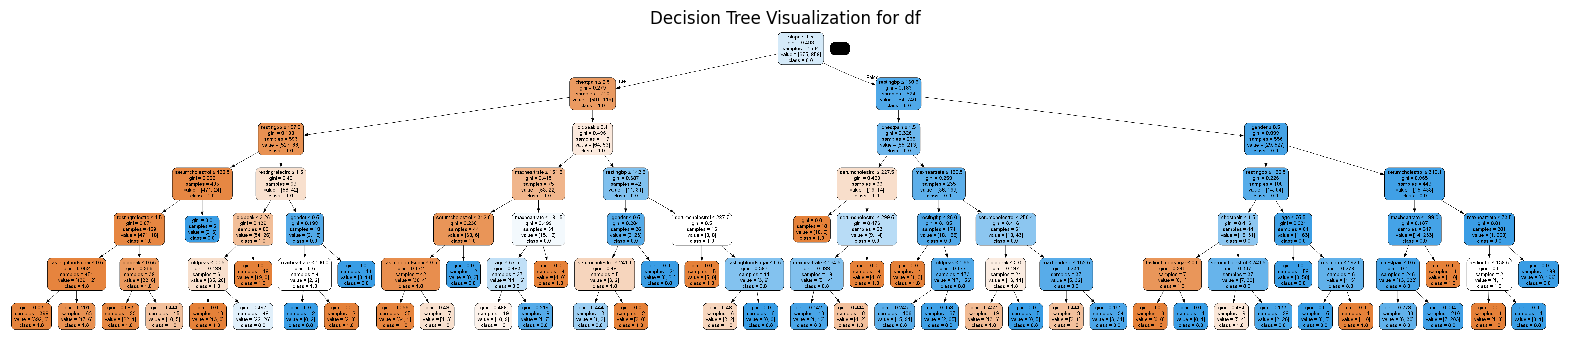

Optimal parameters: {'criterion': 'gini', 'max_depth': 6}
Classification Report for df1: 
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.83       155
         1.0       0.89      0.88      0.89       229

    accuracy                           0.86       384
   macro avg       0.86      0.86      0.86       384
weighted avg       0.86      0.86      0.86       384

PR AUC: 0.9239993740849135
Accuracy for df1: 0.86


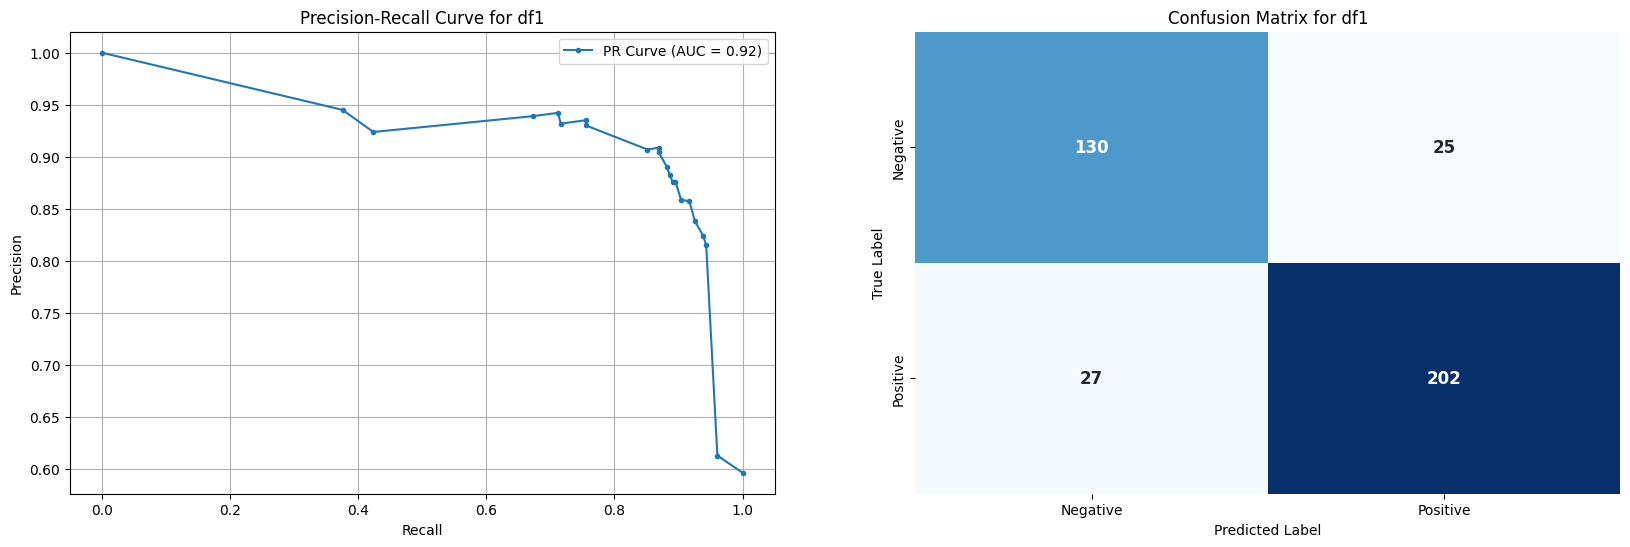

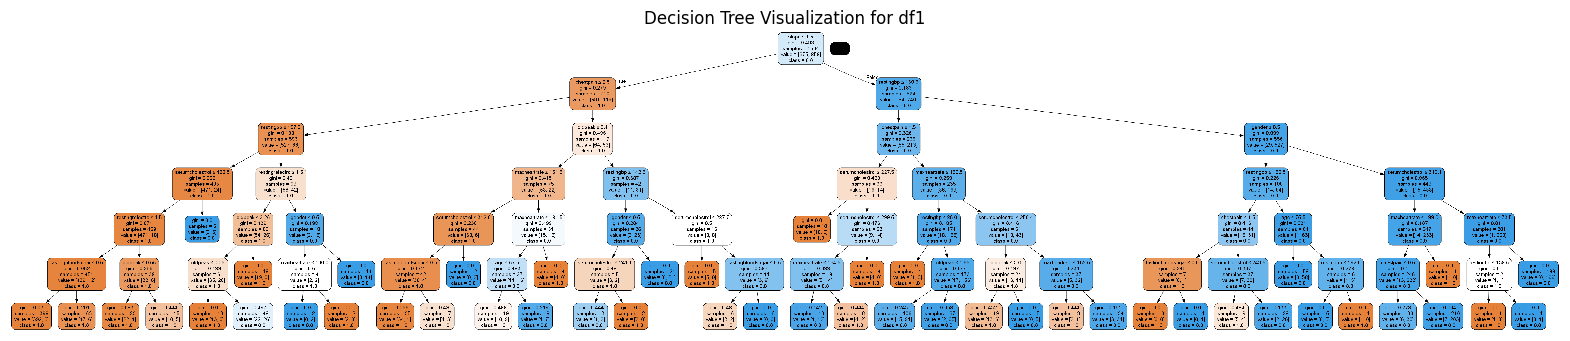

In [162]:
def evaluate_decision_tree(X, y, dataset_label):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the hyperparameter grid for  GridSearchCV
    param_grid = {'max_depth': range(3, 11),
                  'criterion': ['gini', 'entropy'] }

    # Initialize GridSearchCV with cross-validation and avg. precison score as the scoring metric
    grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring=make_scorer(average_precision_score), cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and the best model
    best_params = grid_search.best_params_
    print(f'Optimal parameters: {best_params}')
    best_decisiontree = grid_search.best_estimator_

    # Get the predicted probabilities for the positive class
    y_scores = best_decisiontree.predict_proba(X_test)[:, 1]
    y_pred = best_decisiontree.predict(X_test)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Generate classification report
    class_report = classification_report(y_test, y_pred)
    print(f'Classification Report for {dataset_label}: \n{class_report}')

    # Calculate precision and recall values
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)

    # Calculate the area under the PR curve
    pr_auc = auc(recall, precision)
    print(f'PR AUC: {pr_auc}')

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {dataset_label}: {accuracy:.2f}')

    # Create subplots for the PR curve and confusion matrix
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    
    # Plot the PR curve
    ax[0].plot(recall, precision, marker='.', label=f'PR Curve (AUC = {pr_auc:.2f})')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title(f'Precision-Recall Curve for {dataset_label}')
    ax[0].legend()
    ax[0].grid(True)

    # Plot confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize": 12, "fontweight": "bold", "ha": "center", "va": "center"}, ax=ax[1])
    ax[1].set_title(f'Confusion Matrix for {dataset_label}')
    ax[1].set_xlabel('Predicted Label')
    ax[1].set_ylabel('True Label')
    ax[1].set_xticks([0.5, 1.5])
    ax[1].set_xticklabels(['Negative', 'Positive'])
    ax[1].set_yticks([0.5, 1.5])
    ax[1].set_yticklabels(['Negative', 'Positive'])

    plt.show()

    # Visualize the Decision Tree
    dot_data = StringIO()
    filename = f"{dataset_label}_tree.png"
    feature_names = X.columns
    target_names = y.unique().astype(str)

    export_graphviz(best_decisiontree, out_file=dot_data, 
                    feature_names=feature_names, 
                    class_names=target_names,
                    filled=True, rounded=True, 
                    special_characters=True)
    
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png(filename)
    
    img = mpimg.imread(filename)
    plt.figure(figsize=(20, 20))
    plt.imshow(img, interpolation='nearest')
    plt.title(f'Decision Tree Visualization for {dataset_label}')
    plt.axis('off')
    plt.show()
    

# Dataset labels and data
datasets = {
    'df': (df, 'target'),
    'df1': (df1, 'target')
}

for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    evaluate_decision_tree(X, y, label)


# Random Forest

In [163]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

Classification Report for df: 
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88       155
         1.0       0.92      0.93      0.92       229

    accuracy                           0.91       384
   macro avg       0.90      0.90      0.90       384
weighted avg       0.91      0.91      0.91       384

PR AUC: 0.973219589552883
Accuracy for df: 0.91


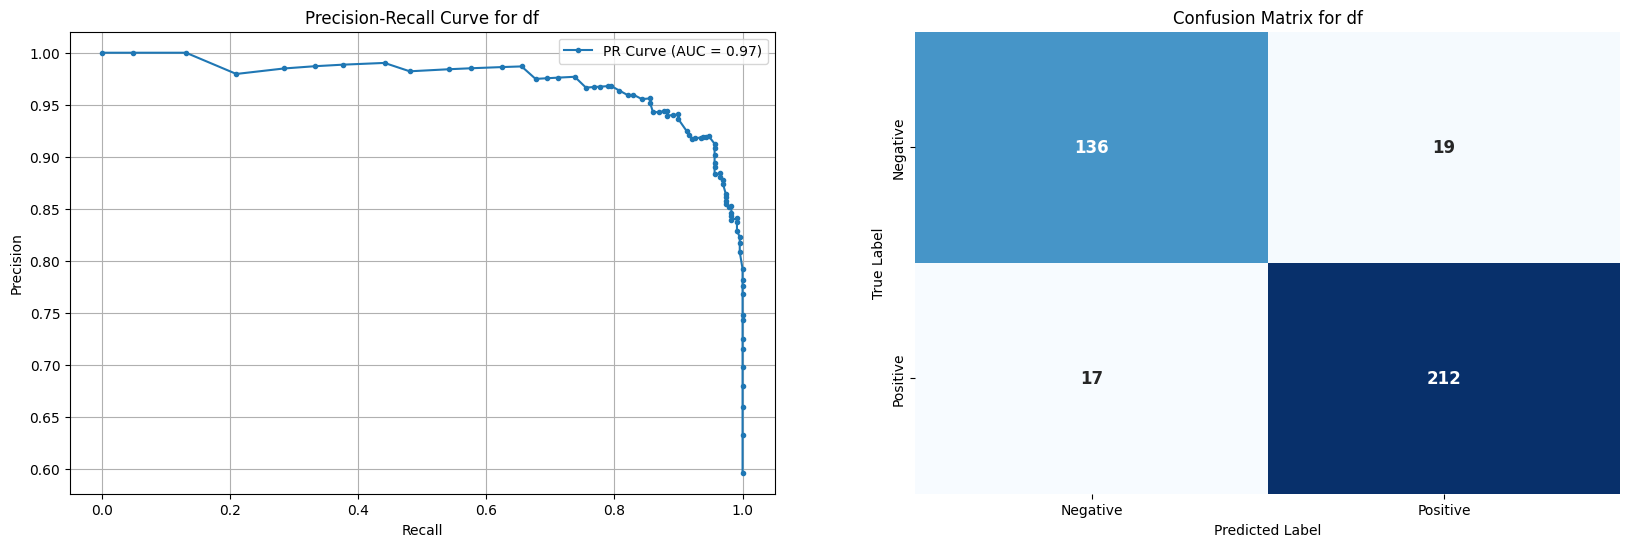

Classification Report for df1: 
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88       155
         1.0       0.92      0.93      0.92       229

    accuracy                           0.91       384
   macro avg       0.90      0.90      0.90       384
weighted avg       0.91      0.91      0.91       384

PR AUC: 0.973219589552883
Accuracy for df1: 0.91


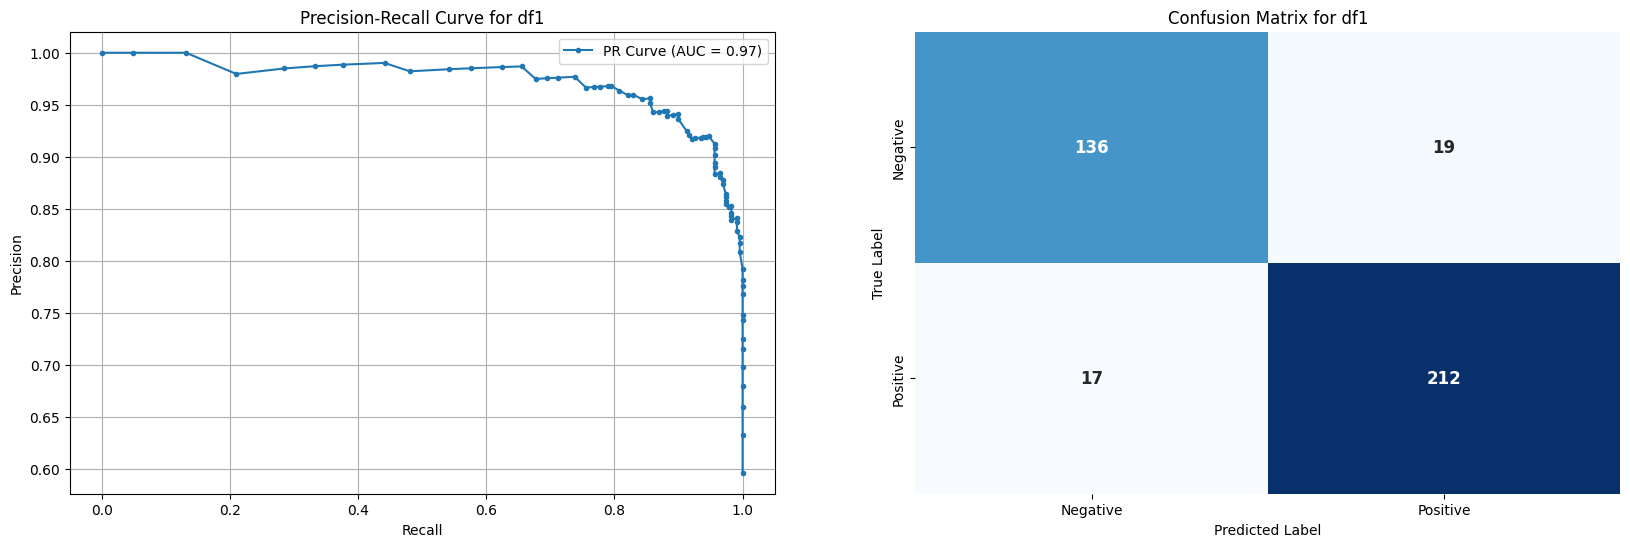

In [164]:
def evaluate_random_forest(X, y, dataset_label):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the RandomForest classifier
    random_forest = RandomForestClassifier(random_state=42)

    # Fit the classifier on the training data
    random_forest.fit(X_train, y_train)

    # Get the predicted probabilities for the positive class
    y_scores = random_forest.predict_proba(X_test)[:, 1]
    y_pred = random_forest.predict(X_test)

    # Generate classification report
    class_report = classification_report(y_test, y_pred)
    print(f'Classification Report for {dataset_label}: \n{class_report}')

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calculate precision and recall values
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)

    # Calculate the area under the PR curve
    pr_auc = auc(recall, precision)
    print(f'PR AUC: {pr_auc}')

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {dataset_label}: {accuracy:.2f}')

    # Create subplots for the PR curve and confusion matrix
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))

    # Plot the PR curve
    ax[0].plot(recall, precision, marker='.', label=f'PR Curve (AUC = {pr_auc:.2f})')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title(f'Precision-Recall Curve for {dataset_label}')
    ax[0].legend()
    ax[0].grid(True)

    # Plot confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize": 12, "fontweight": "bold", "ha": "center", "va": "center"}, ax=ax[1])
    ax[1].set_title(f'Confusion Matrix for {dataset_label}')
    ax[1].set_xlabel('Predicted Label')
    ax[1].set_ylabel('True Label')
    ax[1].set_xticks([0.5, 1.5])
    ax[1].set_xticklabels(['Negative', 'Positive'])
    ax[1].set_yticks([0.5, 1.5])
    ax[1].set_yticklabels(['Negative', 'Positive'])

    plt.show()



# Dataset labels and data (assuming df, df1 are defined as before)
datasets = {
    'df': (df, 'target'),
    'df1': (df1, 'target')
}

for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    evaluate_random_forest(X, y, label)


# SVM

In [165]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns


Best parameters found for df: {'kernel': 'rbf'}
Classification Report for df: 
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       155
         1.0       0.93      0.94      0.93       229

    accuracy                           0.92       384
   macro avg       0.92      0.91      0.92       384
weighted avg       0.92      0.92      0.92       384

PR AUC: 0.9541236290424817
Accuracy for df: 0.92


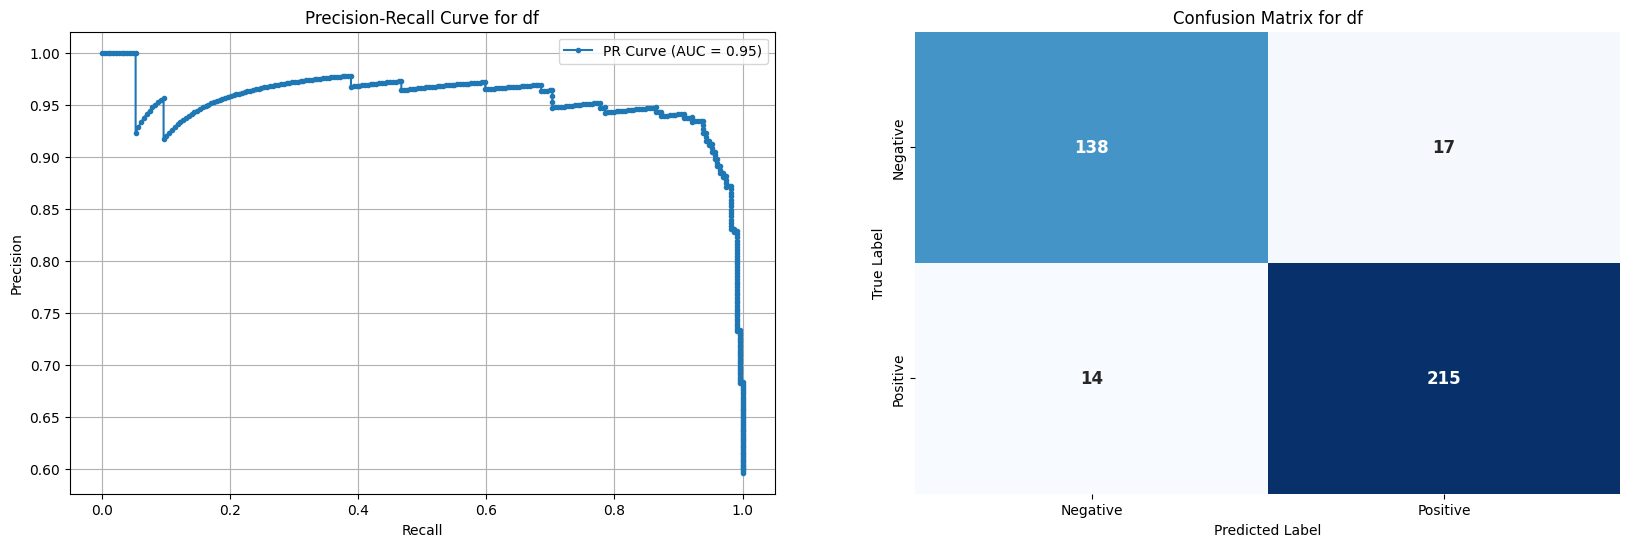

Best parameters found for df1: {'kernel': 'rbf'}
Classification Report for df1: 
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       155
         1.0       0.93      0.94      0.93       229

    accuracy                           0.92       384
   macro avg       0.92      0.91      0.92       384
weighted avg       0.92      0.92      0.92       384

PR AUC: 0.9541236290424818
Accuracy for df1: 0.92


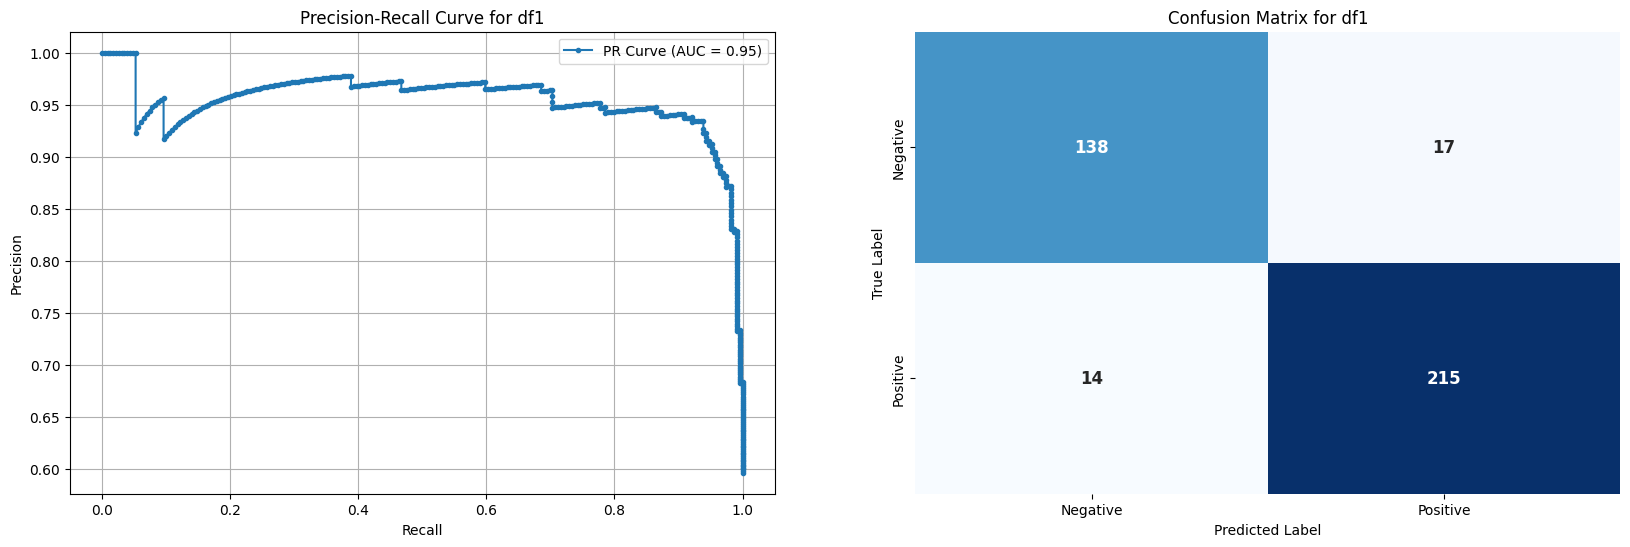

In [166]:

def evaluate_svm(X, y, dataset_label):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the StandardScaler and scale the training data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Scale the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Initialize the SVM classifier
    svm_clf = SVC(C = 1.0, probability=True)

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }

    # Perform Grid Search to find the best parameters
    grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)

    # Get the best parameters found by Grid Search
    best_params = grid_search.best_params_
    print(f'Best parameters found for {dataset_label}: {best_params}')

    # Use best parameters to train SVM
    best_svm_clf = SVC(**best_params, probability=True)
    best_svm_clf.fit(X_train_scaled, y_train)

    # Fit the classifier on the scaled training data
    best_svm_clf.fit(X_train_scaled, y_train)

    # Get the predicted probabilities for the positive class
    y_scores = best_svm_clf.predict_proba(X_test_scaled)[:, 1]
    y_pred = best_svm_clf.predict(X_test_scaled)

    # Generate classification report
    class_report = classification_report(y_test, y_pred)
    print(f'Classification Report for {dataset_label}: \n{class_report}')

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calculate precision and recall values
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)

    # Calculate the area under the PR curve
    pr_auc = auc(recall, precision)
    print(f'PR AUC: {pr_auc}')

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {dataset_label}: {accuracy:.2f}')

    # Create subplots for the PR curve and confusion matrix
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))

    # Plot the PR curve
    ax[0].plot(recall, precision, marker='.', label=f'PR Curve (AUC = {pr_auc:.2f})')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title(f'Precision-Recall Curve for {dataset_label}')
    ax[0].legend()
    ax[0].grid(True)

    # Plot confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize": 12, "fontweight": "bold", "ha": "center", "va": "center"}, ax=ax[1])
    ax[1].set_title(f'Confusion Matrix for {dataset_label}')
    ax[1].set_xlabel('Predicted Label')
    ax[1].set_ylabel('True Label')
    ax[1].set_xticks([0.5, 1.5])
    ax[1].set_xticklabels(['Negative', 'Positive'])
    ax[1].set_yticks([0.5, 1.5])
    ax[1].set_yticklabels(['Negative', 'Positive'])

    plt.show()


    
# Dataset labels and data
datasets = {
    'df': (df, 'target'),
    'df1': (df1, 'target')
}
# Iterate through each dataset, perform svm classification scaling, plot PR curve, ROC curve, and print metrics
for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    evaluate_svm(X, y, label)
